<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/TimeSeriesAnalysisU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

# Importar dataframe si YF da error

In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'B4HOAASXNLT4JMJA'   # esta es m√≠a, no la uses o habr√° problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AMZN
ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas
#ANO-MES-DIA
inicio = '2024-07-24'
fin = '2025-07-20'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

AAPL_Open  AAPL_High  AAPL_Low  AAPL_Close  AAPL_Volume
date                                                               
2025-07-18    210.870    211.790  209.7045      211.18   48974591.0
2025-07-17    210.570    211.800  209.5900      210.02   48068141.0
2025-07-16    210.295    212.400  208.6400      210.16   47490532.0
2025-07-15    209.220    211.890  208.9200      209.11   42296339.0
2025-07-14    209.925    210.910  207.5400      208.62   38840111.0
...               ...        ...       ...         ...          ...
2024-07-30    219.190    220.325  216.1200      218.80   41643840.0
2024-07-29    216.960    219.300  215.7500      218.24   36311778.0
2024-07-26    218.700    219.490  216.0100      217.96   41601345.0
2024-07-25    218.930    220.850  214.6200      217.49   51391199.0
2024-07-24    224.000    224.800  217.1300      218.54   61777576.0

[247 rows x 5 columns]

# Medias m√≥viles

# Prueba Dickey-Fuller Aumentada

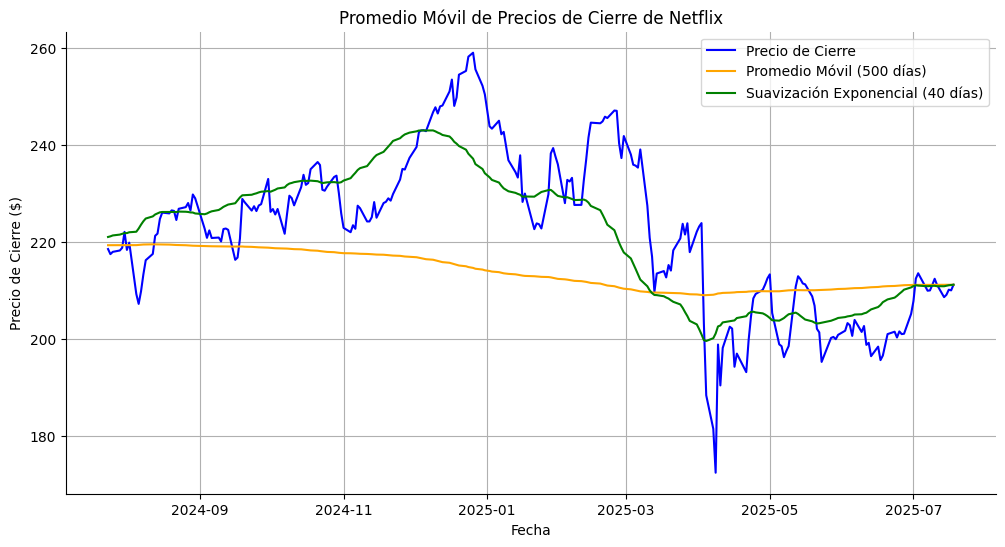

In [ ]:
# Promedio M√≥vil Simple
ventana_sma = 500
df['SMA'] = df['AAPL_Close'].ewm(span=ventana_sma, adjust=False).mean()

# Promedio M√≥vil Exponencial
ventana_ses = 40
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio M√≥vil ({ventana_sma} d√≠as)', color='orange')
plt.plot(df['SES'], label=f'Suavizaci√≥n Exponencial ({ventana_ses} d√≠as)', color='green')
plt.title('Promedio M√≥vil de Precios de Cierre de Netflix')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hip√≥tesis nula (H‚ÇÄ): La serie tiene una ra√≠z unitaria (no es estacionaria).
#Hip√≥tesis alternativa (H‚ÇÅ): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretaci√≥n de la prueba ADF
print('Estad√≠stico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hip√≥tesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).")


Estad√≠stico ADF: -1.9840909477518334
p-value: 0.29359193220515706
La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).


# Regresi√≥n polinomial

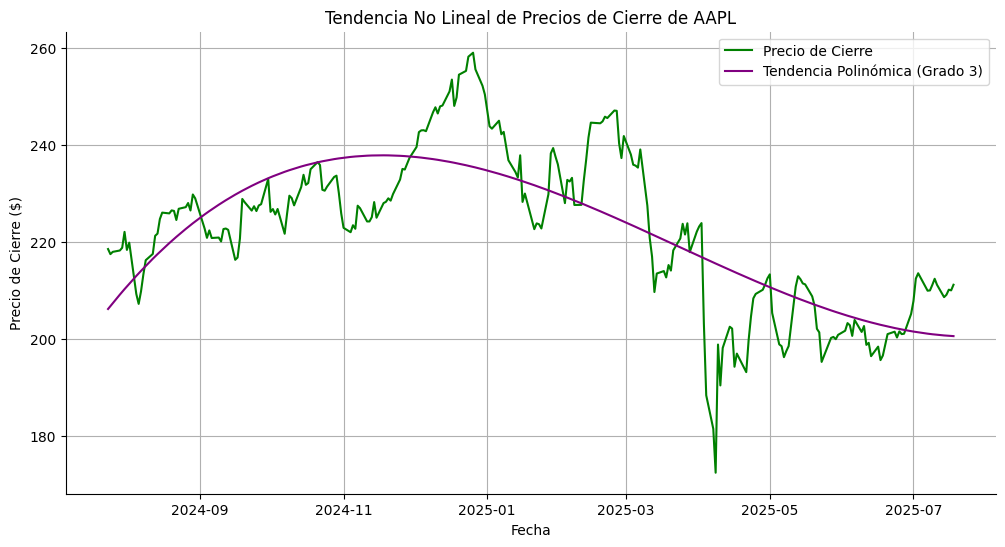

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a n√∫meros
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polin√≥mico
grado = 3
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gr√°fica
plt.figure(
    figsize=(12, 6) # tama√±o (horizontal, vertical)
    )

# qu√© se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecer√° en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polin√≥mica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # T√≠tulo
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadr√≠cula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gr√°fico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # L√≠nea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta raz√≥n, son una herramienta √∫til para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta raz√≥n no les voy a pedir que lo usen. Aqu√≠ lo he simplificado tanto como he podido por si se animan.

In [ ]:
# Aqu√≠ no le muevan a nada
# B√°sicamente, lo que se hace este bloque es crear la funci√≥n
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La funci√≥n acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el par√°metro "terminos" es un n√∫mero natural que indica la cantidad de
  t√©rminos que desarrolla la serie. Entre mayor sea el n√∫mero de t√©rminos,
  la serie ser√° m√°s precisa, pero m√°s dif√≠cil de interpretar.

  La funci√≥n tiene como salida una lista con los componentes sinosoidales de serie.
  El √∫ltimo elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta l√≠nea con tu DataFrame y serie espec√≠ficos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en t√©rminos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el √≠ndice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # √≠ndice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la se√±al en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.008097  1083.809603        123.500000
1    0.020243   779.192341         49.400000
2    0.024291   421.181811         41.166667
3    0.048583   359.403726         20.583333
4    0.004049   290.178413        247.000000


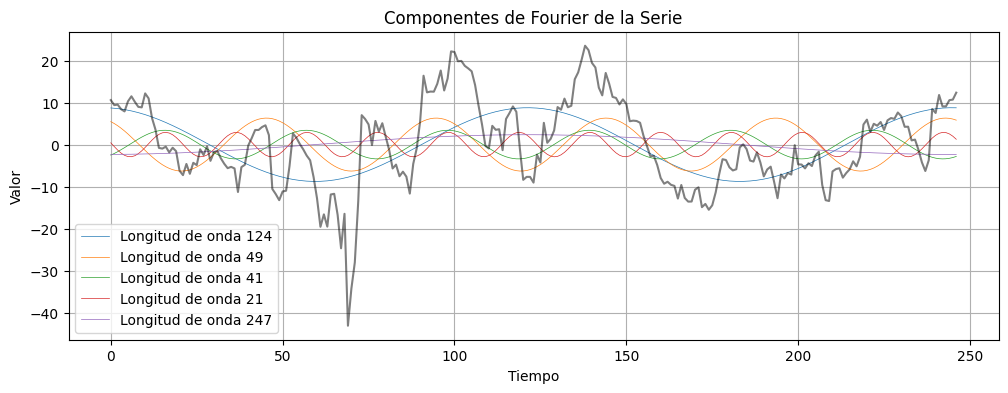

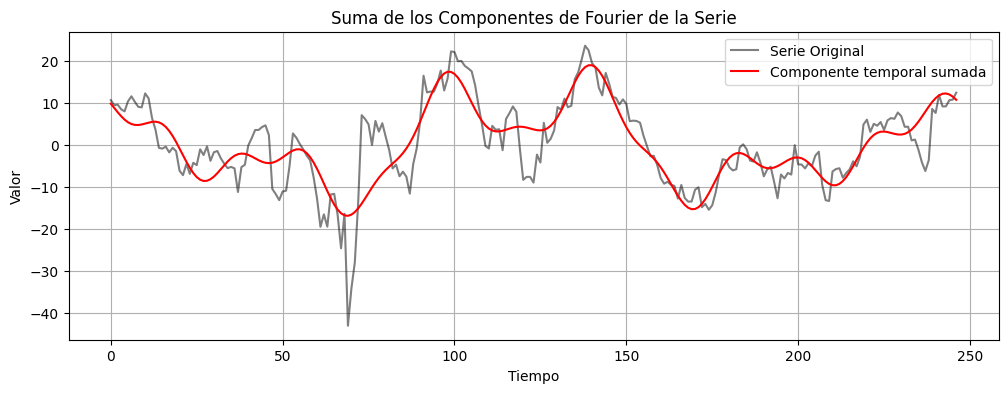

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estos gr√°ficos, la longitud de onda equivale a la unidad de tiempo (en este caso, d√≠as) que tarda la onda en volver al mismo sitio. Algo que en nuestro contexto podr√≠amos interpretar como estasionalidad. Vemos que la oscilaci√≥n m√°s grande se presenta cada 378 d√≠as. Dado que esto es m√°s de un a√±o, esto ser√≠a m√°s bien un ciclo. Sin embargo, se puede apreciar algo muy interesante, la longitud de onda siguiente es de 126 en unidades de tiempo (d√≠as) que es justo la mitad de la cantidad de d√≠as de negociaci√≥n en un a√±o!!! üòØ

# Descomposici√≥n de la serie

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

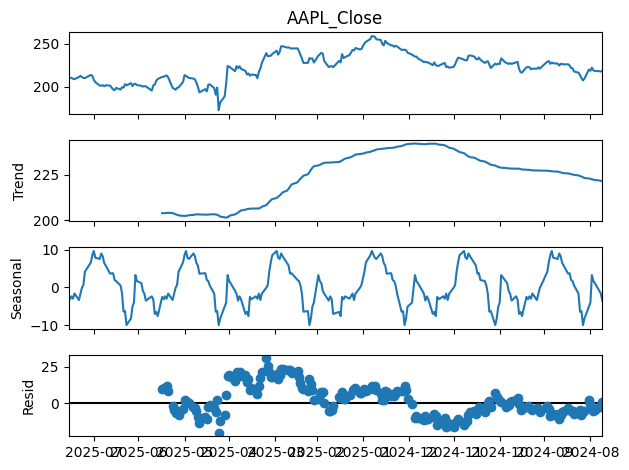

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=42,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 d√≠as de negociaci√≥n al a√±o
fig = descomposicion.plot()
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hip√≥tesis nula (H‚ÇÄ): La serie tiene una ra√≠z unitaria (no es estacionaria).
#Hip√≥tesis alternativa (H‚ÇÅ): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretaci√≥n de la prueba ADF
print('Estad√≠stico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hip√≥tesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).")

Estad√≠stico ADF: -1.9840909477518334
p-value: 0.29359193220515706
La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).


In [ ]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

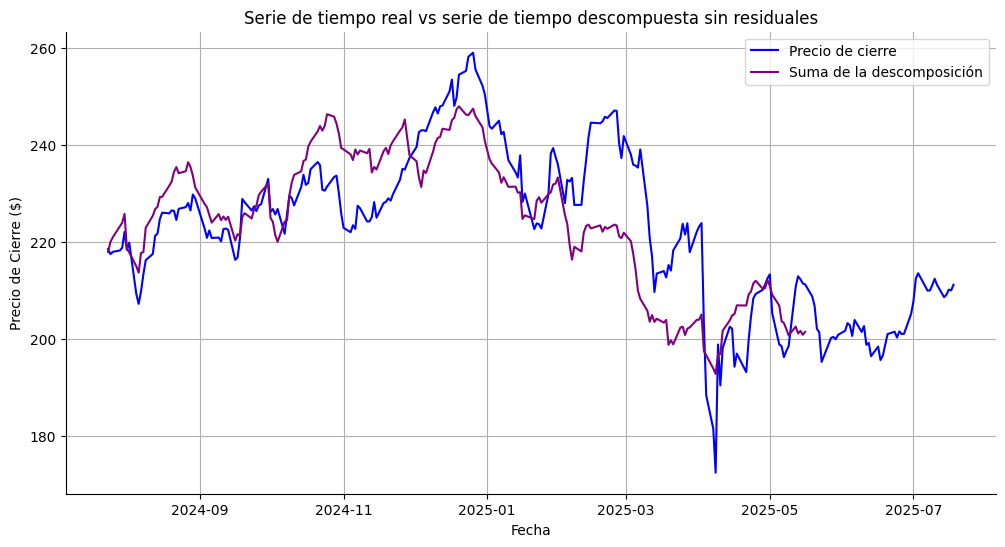

In [ ]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposici√≥n', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('tendencia vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gr√°fico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gr√°fico.

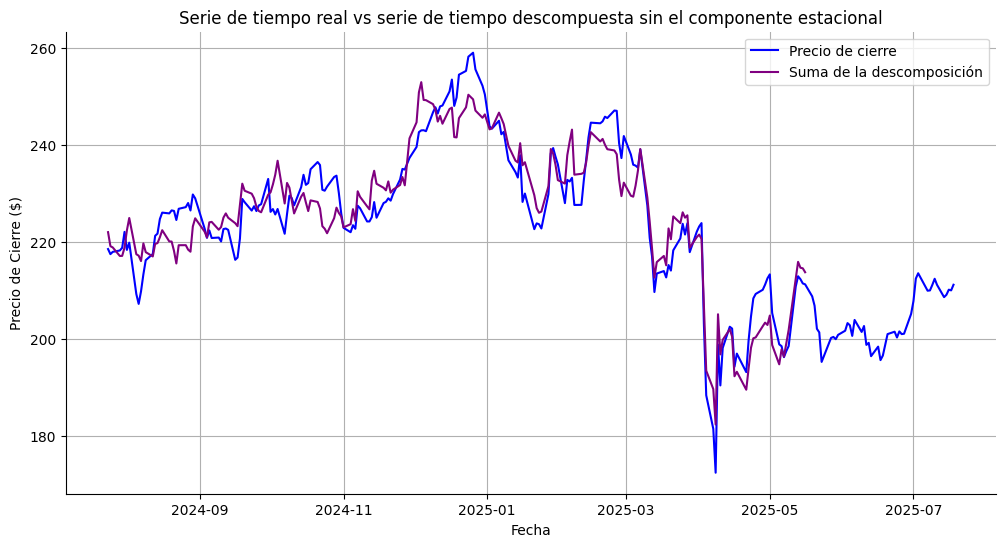

In [ ]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()